In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

## Salary info

In [2]:
# Send GET request to URL
r = requests.get("https://overthecap.com/positional-spending/")

# Convert to BeautifulSoup object
webpage = bs(r.content)

In [3]:
def get_year_table(year):
    """Pull html string for table rows in the specified year."""
    # Return descendent of div tags with id equal to year of interest
    data_table = webpage.find("div", id = ("y" + str(year)))
    
    # Return table rows from the extracted data table
    data_rows = data_table.find_all("tr")
    return data_rows

def pull_data(years):
    """Extract data from HTML strings and convert into a dictionary for each team. Returns list of dictionaries."""
    # Initialize empty list for team dictionaries
    salary_dicts = []
    
    # Iterate through year inputs
    for year in years:
        # Initialize empty list of table headers
        headers = [year]
        data_rows = get_year_table(year)
        
        # Iterate through extracted table rows
        for index, row in enumerate(data_rows):
            # Set year in dictionary to current year iteration
            salary_info = {'year': int(year)}
            
            # Extract headers from first row
            if index == 0:
                header_list = row.find_all("th")
                for header in header_list:
                    headers.append(header.get_text())
            # Extract data from remaining rows
            else:
                data_list = row.find_all("td")
                print("Getting", str(year), "data for", data_list[0].get_text())
                for index, header in enumerate(headers[1:]):
                    # Remove special characters from extracted text
                    if header == 'Team':
                        if data_list[index].get_text() == 'Washington':
                            salary_info[header] = 'Redskins'
                        else:
                            salary_info[header] = data_list[index].get_text()
                    else:
                        salary_info[header] = float(data_list[index].get_text().replace("$","").replace(",",""))
                # Add team salary dictionary to list    
                salary_dicts.append(salary_info)
    return salary_dicts

In [4]:
# Specify years of interest
years = range(2013,2022)

# Run function on years of interest
salary_dicts = pull_data(years)

Getting 2013 data for Eagles
Getting 2013 data for Seahawks
Getting 2013 data for Titans
Getting 2013 data for Broncos
Getting 2013 data for Giants
Getting 2013 data for Texans
Getting 2013 data for Saints
Getting 2013 data for Vikings
Getting 2013 data for Chargers
Getting 2013 data for Falcons
Getting 2013 data for Lions
Getting 2013 data for 49ers
Getting 2013 data for Jets
Getting 2013 data for Packers
Getting 2013 data for Patriots
Getting 2013 data for Washington
Getting 2013 data for Bears
Getting 2013 data for Panthers
Getting 2013 data for Cardinals
Getting 2013 data for Cowboys
Getting 2013 data for Colts
Getting 2013 data for Chiefs
Getting 2013 data for Rams
Getting 2013 data for Buccaneers
Getting 2013 data for Steelers
Getting 2013 data for Jaguars
Getting 2013 data for Bengals
Getting 2013 data for Ravens
Getting 2013 data for Bills
Getting 2013 data for Dolphins
Getting 2013 data for Browns
Getting 2013 data for Raiders
Getting 2014 data for Falcons
Getting 2014 data fo

In [79]:
# Convert list of dictionaries into pandas DataFrame
salary_df = pd.DataFrame(salary_dicts)

# salary_df['Total'] = salary_df.sum(axis=1)
salary_df['Total'] = salary_df["Offense"] + salary_df["Defense"]
salary_df['Skill Position'] = salary_df["QB"] + salary_df["RB"] + salary_df["WR"] + salary_df["S"] + salary_df["CB"]
salary_df_share = salary_df.copy()
salary_df_share.iloc[:,2:] = salary_df.iloc[:,2:].div(salary_df['Total'], axis = 0)
salary_df_share.drop('Total', axis = 1, inplace = True)
salary_df_share

year      Team        QB        RB        WR        TE        OL  \
0    2013    Eagles  0.119013  0.090720  0.171089  0.048983  0.228198   
1    2013  Seahawks  0.012752  0.088448  0.137847  0.104656  0.228950   
2    2013    Titans  0.057875  0.140428  0.115868  0.063743  0.244048   
3    2013   Broncos  0.162978  0.044154  0.088128  0.069784  0.211763   
4    2013    Giants  0.201056  0.046034  0.079310  0.027409  0.221506   
..    ...       ...       ...       ...       ...       ...       ...   
283  2021      Rams  0.157126  0.029018  0.127149  0.071309  0.161875   
284  2021  Steelers  0.179842  0.018661  0.060895  0.061557  0.175816   
285  2021    Chiefs  0.061609  0.038357  0.153473  0.066412  0.135383   
286  2021     Lions  0.102282  0.041465  0.078724  0.063834  0.190647   
287  2021    Ravens  0.030213  0.041164  0.053157  0.080681  0.207488   

      Offense       IDL      EDGE        LB         S        CB   Defense  \
0    0.658004  0.046810  0.091058  0.088957  0.061530  0.053640  0.341996   
1    0.572653  0.063074  0.204860  0.060418  0.070266  0.028729  0.427347   
2    0.621961  0.059332  0.080153  0.052430  0.098426  0.087698  0.378039   
3    0.576807  0.059911  0.046269  0.112783  0.051327  0.152903  0.423193   
4    0.575314  0.046785  0.087044  0.072357  0.116118  0.102382  0.424686   
..        ...       ...       ...       ...       ...       ...       ...   
283  0.546476  0.180632  0.064776  0.042719  0.049257  0.116139  0.453524   
284  0.496771  0.179391  0.081687  0.060977  0.048587  0.132587  0.503229   
285  0.455234  0.080199  0.178049  0.098907  0.142189  0.045421  0.544766   
286  0.476951  0.073604  0.221807  0.107366  0.048520  0.071751  0.523049   
287  0.412703  0.239098  0.041175  0.040785  0.054264  0.211975  0.587297   

     Skill Position  
0          0.495993  
1          0.338042  
2          0.500294  
3          0.499490  
4          0.544900  
..              ...  
283        0.478688  
284        0.440572  
285        0.441049  
286        0.342743  
287        0.390772  

[288 rows x 15 columns]

## Performance Extraction

In [97]:
from sportsipy.nfl.teams import Teams

In [110]:
def extract_sportsipy(metric, year_start = 2013, year_end = 2020):
    df = pd.DataFrame()
    for year in range(year_start, year_end+1):
        for team in Teams(year):
            name = team.name.rsplit(' ', 1)[-1]
            if name == 'Team':
                name = 'Redskins'
            df.loc[name, year] = getattr(team, metric)
    df = df.reset_index().rename(columns = {"index":"Team"})
    df = pd.melt(df, id_vars = ['Team'], value_vars = list(df.columns[1:]), var_name='year', value_name=metric)
    return df

wins = extract_sportsipy("wins").sort_values(['year','Team'])
rush_yards = extract_sportsipy("rush_yards").sort_values(['year','Team'])
pass_yards = extract_sportsipy("pass_yards").sort_values(['year','Team'])
points_for = extract_sportsipy("points_for").sort_values(['year','Team'])
points_against = extract_sportsipy("points_against").sort_values(['year','Team'])

stats = pd.concat([wins, rush_yards.iloc[:,-1], pass_yards.iloc[:,-1], points_for.iloc[:,-1], points_against.iloc[:,-1]], axis=1).reset_index(drop=True)

In [111]:
full_df = pd.merge(salary_df_share, stats, how = 'inner', on = ['Team','year'])
full_df['Team'].unique()

array(['Eagles', 'Seahawks', 'Titans', 'Broncos', 'Giants', 'Texans',
       'Saints', 'Vikings', 'Chargers', 'Falcons', 'Lions', '49ers',
       'Jets', 'Packers', 'Patriots', 'Redskins', 'Bears', 'Panthers',
       'Cardinals', 'Cowboys', 'Colts', 'Chiefs', 'Rams', 'Buccaneers',
       'Steelers', 'Jaguars', 'Bengals', 'Ravens', 'Bills', 'Dolphins',
       'Browns', 'Raiders'], dtype=object)

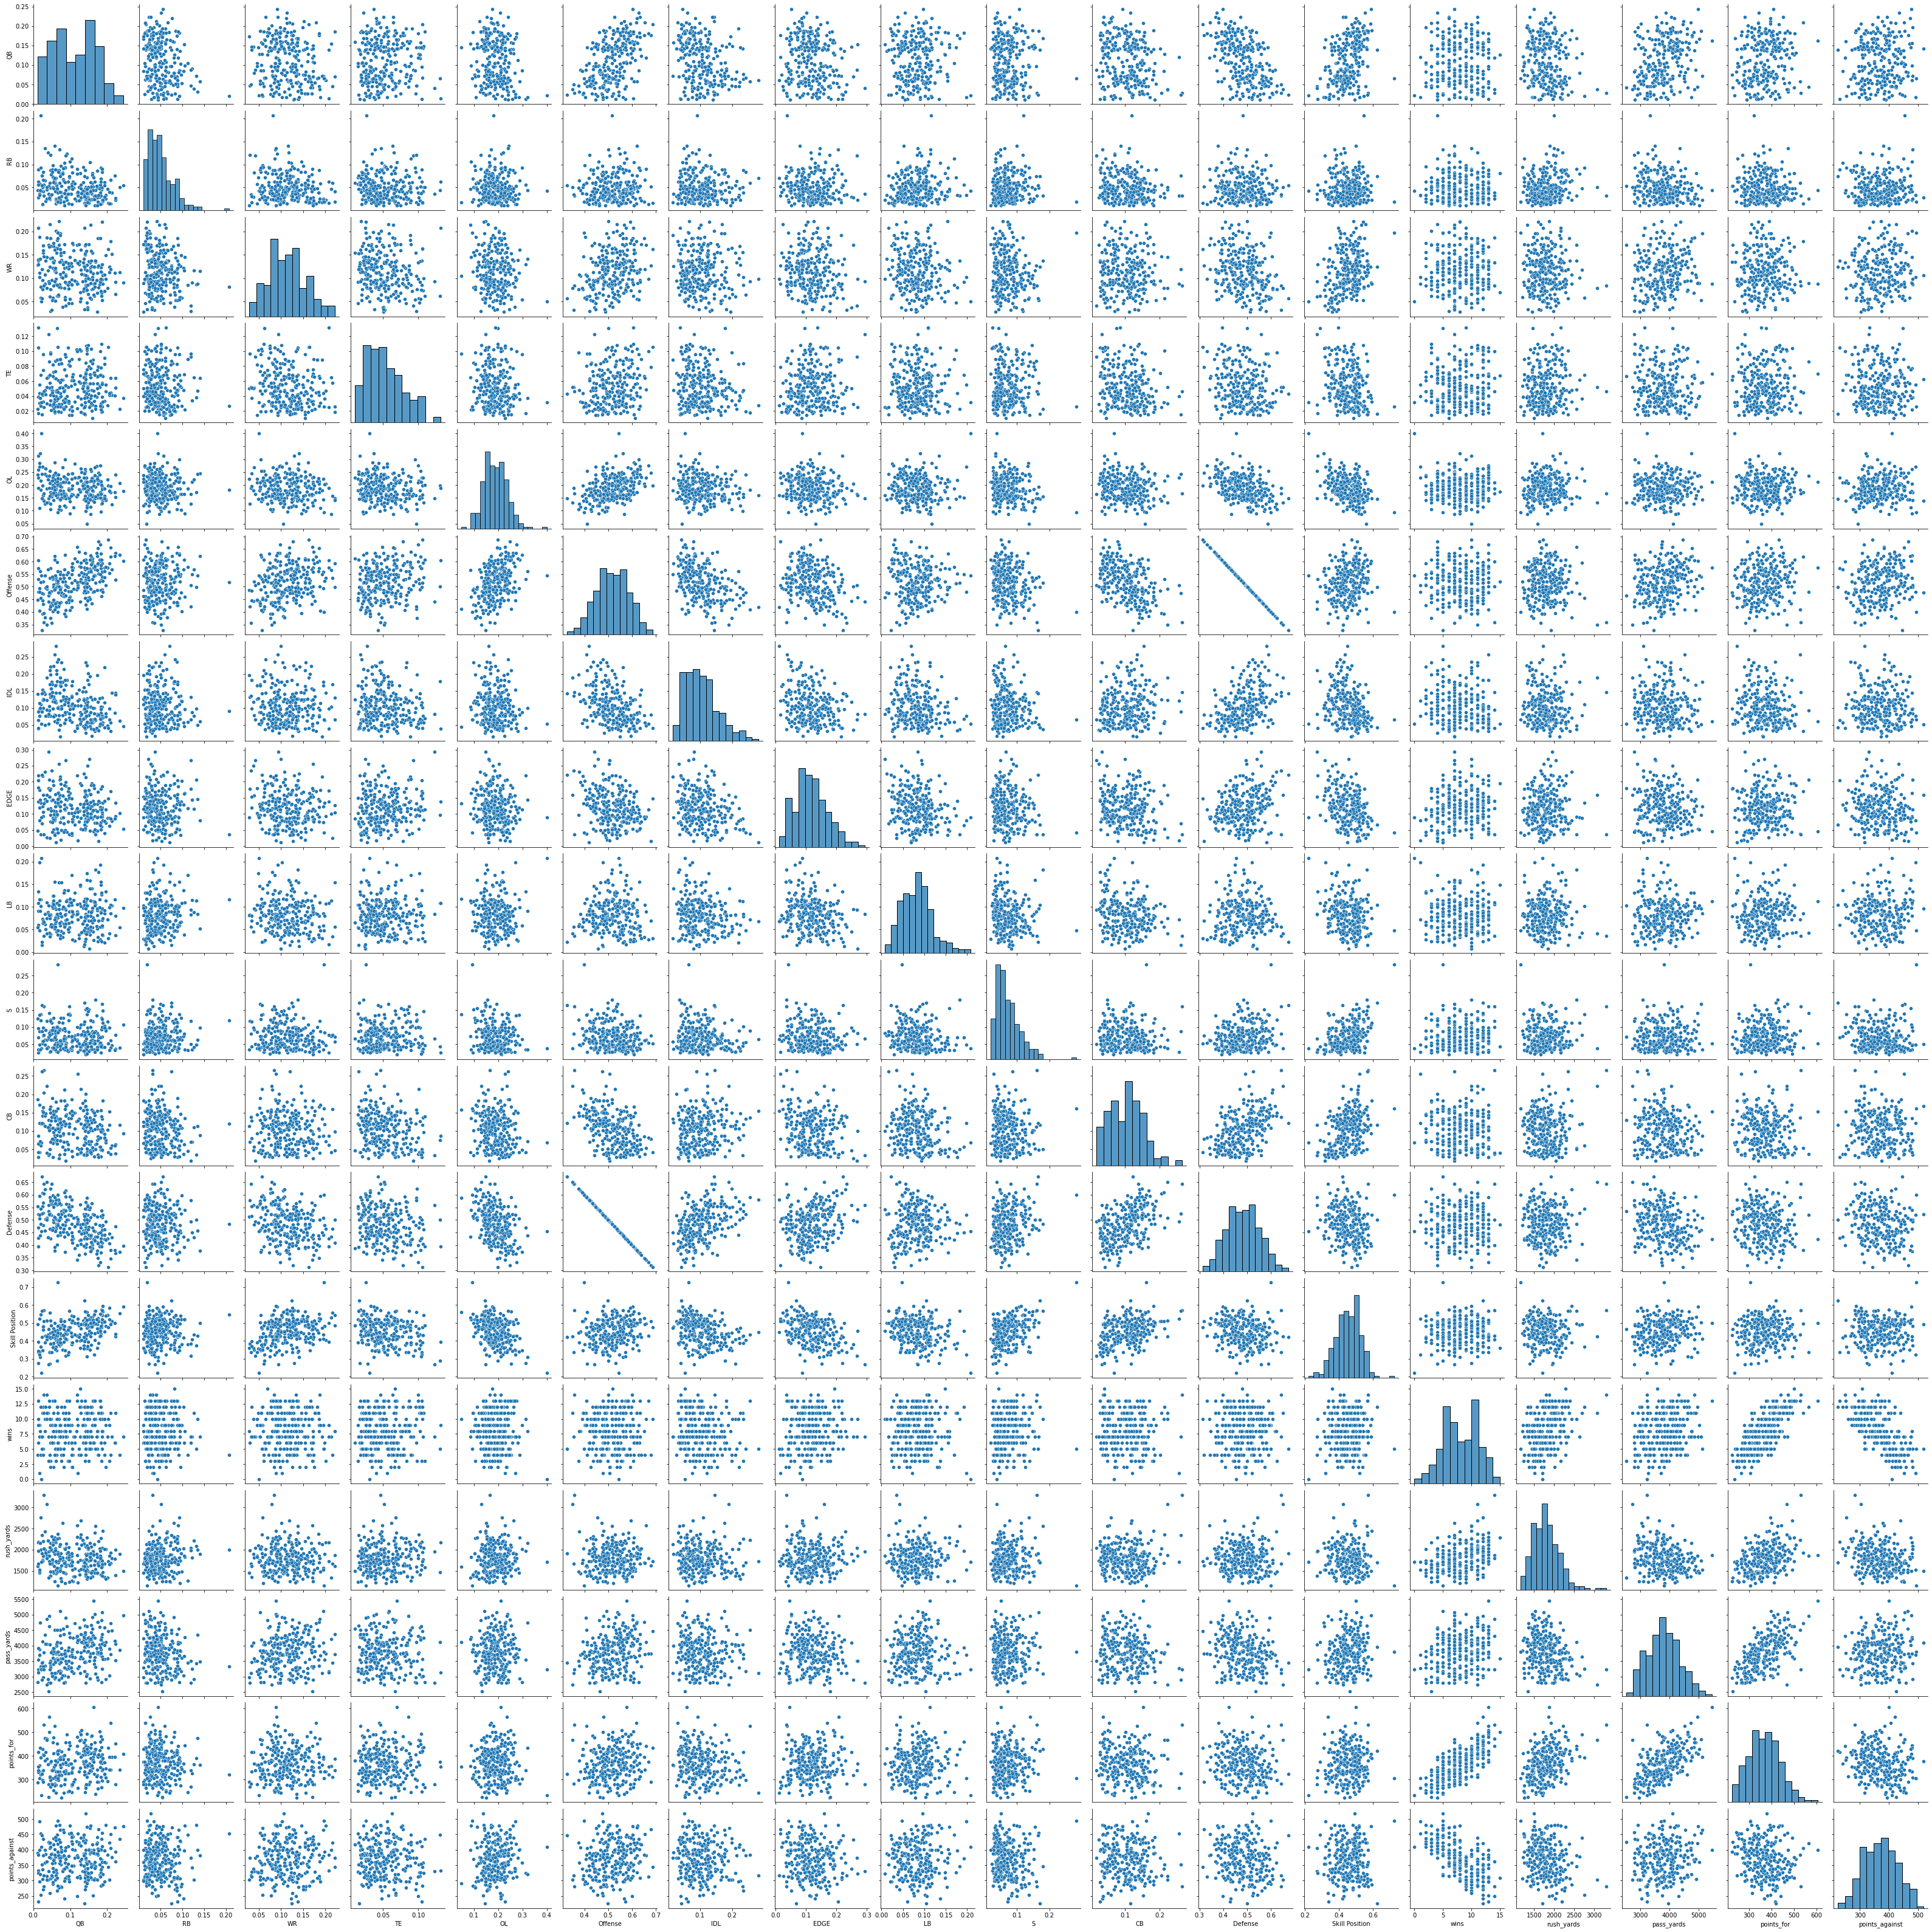

In [112]:
sns.pairplot(full_df, vars = list(full_df.columns[2:]))

In [113]:
full_df[2:].corr()

QB        RB        WR        TE        OL   Offense  \
QB              1.000000 -0.253587 -0.150225  0.051306 -0.156324  0.534083   
RB             -0.253587  1.000000 -0.176340 -0.058566 -0.029479  0.056597   
WR             -0.150225 -0.176340  1.000000 -0.165154 -0.125705  0.269050   
TE              0.051306 -0.058566 -0.165154  1.000000 -0.125275  0.201756   
OL             -0.156324 -0.029479 -0.125705 -0.125275  1.000000  0.429105   
Offense         0.534083  0.056597  0.269050  0.201756  0.429105  1.000000   
IDL            -0.315224 -0.038724 -0.052698 -0.133768 -0.115818 -0.437390   
EDGE           -0.143798 -0.046718 -0.120221  0.084250 -0.153735 -0.286575   
LB              0.010181  0.110738 -0.135165  0.011521  0.010713 -0.016957   
S              -0.044341  0.049365 -0.080290 -0.008098 -0.195601 -0.203897   
CB             -0.241450 -0.108838 -0.031455 -0.240090 -0.176501 -0.474564   
Defense        -0.534083 -0.056597 -0.269050 -0.201756 -0.429105 -1.000000   
Skill Position  0.410856  0.046515  0.337332 -0.246544 -0.428612  0.174811   
wins            0.079587 -0.066292 -0.035373  0.049074 -0.084655 -0.024366   
rush_yards     -0.170917  0.148579 -0.068519  0.050434  0.057985 -0.061709   
pass_yards      0.318170 -0.200188  0.125689 -0.046714  0.017031  0.249702   
points_for      0.151161 -0.071155  0.004049  0.025609 -0.014376  0.096601   
points_against  0.050334  0.013774  0.088945 -0.038811  0.122332  0.172080   

                     IDL      EDGE        LB         S        CB   Defense  \
QB             -0.315224 -0.143798  0.010181 -0.044341 -0.241450 -0.534083   
RB             -0.038724 -0.046718  0.110738  0.049365 -0.108838 -0.056597   
WR             -0.052698 -0.120221 -0.135165 -0.080290 -0.031455 -0.269050   
TE             -0.133768  0.084250  0.011521 -0.008098 -0.240090 -0.201756   
OL             -0.115818 -0.153735  0.010713 -0.195601 -0.176501 -0.429105   
Offense        -0.437390 -0.286575 -0.016957 -0.203897 -0.474564 -1.000000   
IDL             1.000000 -0.249674 -0.191177 -0.161894  0.109136  0.437390   
EDGE           -0.249674  1.000000 -0.194763 -0.102548 -0.204243  0.286575   
LB             -0.191177 -0.194763  1.000000 -0.139877 -0.204027  0.016957   
S              -0.161894 -0.102548 -0.139877  1.000000 -0.086011  0.203897   
CB              0.109136 -0.204243 -0.204027 -0.086011  1.000000  0.474564   
Defense         0.437390  0.286575  0.016957  0.203897  0.474564  1.000000   
Skill Position -0.303840 -0.393206 -0.237418  0.394609  0.379972 -0.174811   
wins           -0.106517  0.106954 -0.002662  0.100227 -0.045239  0.024366   
rush_yards     -0.026013  0.019677  0.006226  0.032519  0.063726  0.061709   
pass_yards     -0.087293 -0.099446  0.006686  0.009433 -0.165137 -0.249702   
points_for     -0.149825  0.024936  0.020464  0.073480 -0.078081 -0.096601   
points_against -0.063382 -0.092656  0.060432 -0.063581 -0.072360 -0.172080   

                Skill Position      wins  rush_yards  pass_yards  points_for  \
QB                    0.410856  0.079587   -0.170917    0.318170    0.151161   
RB                    0.046515 -0.066292    0.148579   -0.200188   -0.071155   
WR                    0.337332 -0.035373   -0.068519    0.125689    0.004049   
TE                   -0.246544  0.049074    0.050434   -0.046714    0.025609   
OL                   -0.428612 -0.084655    0.057985    0.017031   -0.014376   
Offense               0.174811 -0.024366   -0.061709    0.249702    0.096601   
IDL                  -0.303840 -0.106517   -0.026013   -0.087293   -0.149825   
EDGE                 -0.393206  0.106954    0.019677   -0.099446    0.024936   
LB                   -0.237418 -0.002662    0.006226    0.006686    0.020464   
S                     0.394609  0.100227    0.032519    0.009433    0.073480   
CB                    0.379972 -0.045239    0.063726   -0.165137   -0.078081   
Defense              -0.174811  0.024366    0.061709   -0.249702   -0.096601   
Skill Position  

<AxesSubplot:xlabel='Offense', ylabel='Defense'>

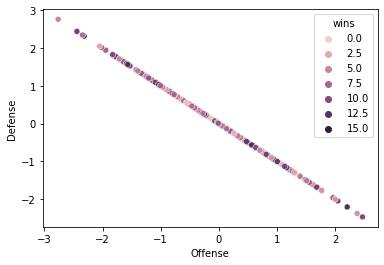

In [122]:
from sklearn.preprocessing import StandardScaler

full_df_scaled = full_df.copy()
y = full_df['wins'].copy()
scaled_features = StandardScaler().fit_transform(full_df_scaled.loc[:,'QB':'Skill Position'])

full_df_scaled.loc[:,'QB':'Skill Position'] = scaled_features

sns.scatterplot(data = full_df_scaled, x = 'Offense', y = 'Defense', hue = 'wins')

In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(full_df_scaled.loc[:,'QB':'Skill Position'])

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=list(full_df_scaled.loc[:,'QB':'Skill Position'].columns))
print(loadings.sort_values('PC1', ascending = False))
print(pca.explained_variance_ratio_)


PCdf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])
PCdf_full = pd.concat([PCdf, y], axis = 1)

                     PC1       PC2       PC3       PC4
Defense         0.547511  0.014395  0.098813  0.030232
IDL             0.300016 -0.075935 -0.378572 -0.075756
CB              0.289097  0.328730 -0.240840 -0.036429
EDGE            0.136926 -0.272407  0.444432 -0.392501
S               0.075426  0.281213  0.359260  0.268891
RB             -0.009473 -0.073332  0.019092  0.590306
LB             -0.044150 -0.192431  0.025605  0.517219
Skill Position -0.110497  0.651490  0.057781  0.088633
TE             -0.117481 -0.220157  0.384049 -0.122943
WR             -0.130730  0.243167 -0.276523 -0.341492
OL             -0.210652 -0.332453 -0.406127  0.059408
QB             -0.336042  0.217940  0.243532 -0.075186
Offense        -0.547511 -0.014395 -0.098813 -0.030232
[0.24816439 0.16844854 0.11636307 0.09928541]


In [132]:
PCdf_full.corr()

PC1           PC2           PC3           PC4      wins
PC1   1.000000e+00  1.858027e-16  7.538429e-17 -1.759725e-16 -0.013984
PC2   1.858027e-16  1.000000e+00 -4.025872e-16  1.109294e-16  0.019933
PC3   7.538429e-17 -4.025872e-16  1.000000e+00 -8.038525e-17  0.182843
PC4  -1.759725e-16  1.109294e-16 -8.038525e-17  1.000000e+00 -0.041118
wins -1.398392e-02  1.993275e-02  1.828434e-01 -4.111774e-02  1.000000

In [92]:
dvoa_df = pd.DataFrame()
for year in range(2013, 2021):
    overall_df = pd.read_csv("./DVOA/" + str(year) + " Team DVOA Ratings Overall.csv").sort_values(by = 'Team')
    overall_df['year'] = year
    offense_df = pd.read_csv("./DVOA/" + str(year) + " Team DVOA Ratings Offense.csv").sort_values(by = 'Team')
    defense_df = pd.read_csv("./DVOA/" + str(year) + " Team DVOA Ratings Defense.csv").sort_values(by = 'Team')
    year_df = pd.concat([overall_df[['Team',
                                     'year',
                                     'Total DVOA',
                                     'Offense DVOA',
                                     'Defense DVOA',
                                     'Special Teams DVOA',
                                     'Unadj. Total VOA','Variance']],
                         offense_df[['Pass DVOA',
                                    'Rush DVOA',
                                    'Unadj. Pass VOA',
                                    'Unadj. Rush VOA',
                                    'Variance']],
                         defense_df[['Pass DVOA',
                                    'Rush DVOA',
                                    'Unadj. Pass VOA',
                                    'Unadj. Rush VOA',
                                    'Variance']]], axis = 1)
    dvoa_df = pd.concat([dvoa_df, year_df])
dvoa_df.columns = ['Team',
                   'year',
                   'Total DVOA',
                   'Offense DVOA',
                   'Defense DVOA',
                   'Special Teams DVOA',
                   'Unadj. Total VOA',
                   'Overall Variance',
                   'Pass DVOA',
                   'Rush DVOA',
                   'Unadj. Pass VOA',
                   'Unadj. Rush VOA',
                   'Offense Variance',
                   'Pass Def DVOA',
                   'Rush Def DVOA',
                   'Unadj. Pass Def VOA',
                   'Unadj. Rush Def VOA',
                   'Defense Variance']
dvoa_df.reset_index(drop = True, inplace = True)
team_names = pd.read_csv("./Teams.csv")
dvoa_df = pd.merge(team_names, dvoa_df, left_on = 'City', right_on = 'Team', suffixes = ('','_drop'))
dvoa_df.drop(['City', 'Team_drop'], axis = 1, inplace = True)
dvoa_df.iloc[:,2:] = dvoa_df.iloc[:,2:].replace({'%':""}, regex=True).astype(float)
dvoa_df

Team    year  Total DVOA  Offense DVOA  Defense DVOA  \
0    Patriots  2013.0        17.9          16.5           5.3   
1    Patriots  2014.0        21.6          13.9          -2.0   
2    Patriots  2015.0        22.6          15.4          -3.4   
3    Patriots  2016.0        25.1          21.2          -1.6   
4    Patriots  2017.0        22.2          27.9          12.0   
..        ...     ...         ...           ...           ...   
251   Raiders  2018.0       -23.4          -7.7          14.2   
252   Raiders  2019.0       -12.7           5.4          15.8   
253      Rams  2013.0         5.4          -9.7          -8.9   
254      Rams  2014.0        -0.7         -11.0          -6.9   
255      Rams  2015.0         0.9         -15.5         -14.0   

     Special Teams DVOA  Unadj. Total VOA  Overall Variance  Pass DVOA  \
0                   6.7              16.7               4.7       37.3   
1                   5.7              19.3              17.3       36.0   
2                   3.9              24.2              12.4       24.5   
3                   2.3              30.5              12.7       51.1   
4                   6.3              24.4              11.1       30.9   
..                  ...               ...               ...        ...   
251                -1.6             -30.2              22.0      -22.6   
252                -2.3             -11.6              19.4        3.8   
253                 6.3               2.1              23.5       13.7   
254                 3.5              -2.2              27.8        6.2   
255                 2.4              -5.0              14.6       24.5   

     Rush DVOA  Unadj. Pass VOA  Unadj. Rush VOA  Offense Variance  \
0         -8.4             33.8             -8.9               7.1   
1          6.6             36.3              4.0               7.6   
2          8.4             21.7              9.7               4.5   
3          2.4             47.7              4.0               3.5   
4          0.4             29.1             -0.3              10.1   
..         ...              ...              ...               ...   
251      -24.6            -23.0            -25.4              13.7   
252      -19.6              2.0            -20.7               2.7   
253       -6.9             15.8             -5.7              11.6   
254        0.4              6.7              2.2               9.2   
255      -17.9             29.2            -13.3               6.4   

     Pass Def DVOA  Rush Def DVOA  Unadj. Pass Def VOA  Unadj. Rush Def VOA  \
0            -12.7          -10.4                -16.0                -16.2   
1             -5.6          -15.3                 -4.1                -11.7   
2             -0.9          -33.9                 -5.6                -35.8   
3            -24.5           -8.4                -19.4                -10.0   
4            -10.8          -12.2                 -3.6                 -9.7   
..             ...            ...                  ...                  ...   
251           32.3           -5.0                 36.5                  0.1   
252           14.1           -1.2                 15.7                 -2.7   
253            4.1          -19.3                  1.5                -19.6   
254            8.1           -6.7                  6.0                 -7.9   
255            6.8          -12.7                  8.2                -16.5   

     Defense Variance  
0                 8.7  
1                 9.4  
2                 4.2  
3                 6.2  
4                 6.2  
..                ...  
251               4.6  
252               2.5  
253               8.9  
254               8.6  
255               3.7  

[256 rows x 18 columns]

In [140]:
full_dvoa_df = pd.merge(full_df, dvoa_df, on = ['Team','year'])
corr_mat = full_dvoa_df.corr()
corr_mat

QB        RB        WR        TE        OL  \
QB                   1.000000 -0.258653 -0.151825  0.036620 -0.160439   
RB                  -0.258653  1.000000 -0.163790 -0.047869 -0.019843   
WR                  -0.151825 -0.163790  1.000000 -0.159540 -0.118422   
TE                   0.036620 -0.047869 -0.159540  1.000000 -0.117564   
OL                  -0.160439 -0.019843 -0.118422 -0.117564  1.000000   
Offense              0.521228  0.071381  0.277977  0.203384  0.433362   
IDL                 -0.306980 -0.049065 -0.060152 -0.138018 -0.121669   
EDGE                -0.153598 -0.040321 -0.118144  0.096332 -0.148555   
LB                   0.014451  0.107512 -0.134934  0.006420  0.009148   
S                   -0.043834  0.047047 -0.081614 -0.008292 -0.196169   
CB                  -0.228020 -0.121471 -0.040144 -0.248272 -0.183622   
Defense             -0.521228 -0.071381 -0.277977 -0.203384 -0.433362   
Skill Position       0.417360  0.040746  0.333614 -0.256231 -0.428372   
wins                 0.067878 -0.053227 -0.028026  0.060761 -0.076243   
rush_yards          -0.174583  0.164956 -0.052180  0.057429  0.068978   
pass_yards           0.322629 -0.200217  0.125697 -0.054551  0.015450   
points_for           0.145422 -0.060622  0.011260  0.030290 -0.008285   
points_against       0.066089  0.002129  0.083521 -0.057212  0.113187   
Total DVOA           0.107445 -0.050361 -0.037959  0.062819 -0.042785   
Offense DVOA         0.178405 -0.096429  0.074025  0.068477  0.020526   
Defense DVOA         0.067759 -0.026110  0.129892  0.004537  0.088817   
Special Teams DVOA   0.035503  0.042825 -0.102672  0.058401 -0.042124   
Unadj. Total VOA     0.092216 -0.058255 -0.045901  0.067922 -0.041236   
Overall Variance    -0.111454  0.033061 -0.055375  0.010964  0.040992   
Pass DVOA            0.088317 -0.042339  0.007981  0.064192 -0.062221   
Rush DVOA            0.095703 -0.103357 -0.144672  0.028242  0.055220   
Unadj. Pass VOA      0.084512 -0.030668  0.009899  0.056648 -0.075829   
Unadj. Rush VOA      0.093330 -0.100818 -0.125352  0.015986  0.038939   
Offense Variance     0.044368  0.098079 -0.074656  0.028421  0.018743   
Pass Def DVOA       -0.111016  0.044396  0.056767 -0.018106  0.069779   
Rush Def DVOA       -0.030797  0.107380 -0.005412 -0.077678 -0.030175   
Unadj. Pass Def VOA -0.116680  0.041958  0.057071  0.003827  0.057273   
Unadj. Rush Def VOA -0.005183  0.122378  0.000244 -0.094776 -0.012808   
Defense Variance     0.163107 -0.048326 -0.066117  0.087460 -0.028712   

                      Offense       IDL      EDGE        LB         S  ...  \
QB                   0.521228 -0.306980 -0.153598  0.014451 -0.043834  ...   
RB                   0.071381 -0.049065 -0.040321  0.107512  0.047047  ...   
WR                   0.277977 -0.060152 -0.118144 -0.134934 -0.081614  ...   
TE                   0.203384 -0.138018  0.096332  0.006420 -0.008292  ...   
OL                   0.433362 -0.121669 -0.148555  0.009148 -0.196169  ...   
Offense              1.000000 -0.443360 -0.281087 -0.017363 -0.204446  ...   
IDL                 -0.443360  1.000000 -0.250271 -0.189041 -0.159727  ...   
EDGE                -0.281087 -0.250271  1.000000 -0.197789 -0.101710  ...   
LB                  -0.017363 -0.189041 -0.197789  1.000000 -0.139803  ...   
S                   -0.204446 -0.159727 -0.101710 -0.139803  1.000000  ...   
CB                  -0.480215  0.117810 -0.209591 -0.199323 -0.083825  ...   
Defense             -1.000000  0.443360  0.281087  0.017363  0.204446  ...   
Skill Position       0.171815 -0.298362 -0.400171 -0.231554  0.391923  ...   
wins                -0.013592 -0.113646  0.114734 -0.006113  0.098507  ...   
rush_yards          -0.037465 -0.040077  0.022301  0.004808  0.029084  ...   
pass_yards           0.248116 -0.086062 -0.106230  0.009500  0.008957  ...   
points_for           0.106275 -0.155896  0.027118  0.019384  0.071834  ...   
points_against       0.162687 -0.055653 -0.106913  0.065669 -0.0625

Basic correlation analysis show that performance is correlated with wins (obviously) but salaries do not seem to be associated with either.

In [156]:
PCdf_full = pd.concat([full_dvoa_df.iloc[:,15:], PCdf], axis = 1)
PCdf_full.corr().iloc[:,21:].round(decimals = 2)
# sns.scatterplot(data = PCdf_full, x = 'PC1', y = 'pass_yards', hue = 'wins')
PCdf_full

wins  rush_yards  pass_yards  points_for  points_against  Total DVOA  \
0    10.0      2566.0      4110.0       442.0           382.0        13.5   
1    13.0      2188.0      3236.0       417.0           231.0        40.0   
2     7.0      1894.0      3496.0       362.0           381.0        -6.5   
3    13.0      1873.0      5444.0       606.0           399.0        33.2   
4     7.0      1332.0      3588.0       294.0           383.0       -16.5   
..    ...         ...         ...         ...             ...         ...   
251   2.0      1683.0      2796.0       243.0           457.0       -30.5   
252  10.0      1688.0      3736.0       404.0           338.0         4.6   
253   1.0      1519.0      3699.0       306.0           492.0       -28.0   
254  11.0      3071.0      2739.0       468.0           303.0        18.5   
255   5.0      1918.0      3451.0       323.0           446.0       -21.9   

     Offense DVOA  Defense DVOA  Special Teams DVOA  Unadj. Total VOA  ...  \
0            22.6           6.2                -2.8              15.5  ...   
1            10.1         -25.1                 4.7              41.0  ...   
2             1.6           4.8                -3.2              -3.3  ...   
3            34.2           0.0                -1.0              41.3  ...   
4           -22.0         -10.6                -5.1             -21.7  ...   
..            ...           ...                 ...               ...  ...   
251         -20.5           4.7                -5.3             -38.1  ...   
252          -2.1          -3.3                 3.3               8.9  ...   
253         -12.6          15.2                -0.1             -28.5  ...   
254           4.3          -6.9                 7.4              22.9  ...   
255         -20.0          -0.2                -2.1             -23.9  ...   

     Offense Variance  Pass Def DVOA  Rush Def DVOA  Unadj. Pass Def VOA  \
0                 6.6           -1.3          -16.0                  2.1   
1                 5.9          -30.2          -17.9                -31.3   
2                 6.1           12.3           -3.5                 16.7   
3                 4.2          -14.1          -28.2                -11.7   
4                12.2           18.9           -2.7                 14.6   
..                ...            ...            ...                  ...   
251               3.4           32.5           -0.5                 36.6   
252               1.9            2.2           -8.3                 -0.7   
253               9.8           30.1           -1.4                 35.2   
254               4.3           -2.9          -19.7                 -2.3   
255              10.8           25.3           -8.8                 24.0   

     Unadj. Rush Def VOA  Defense Variance       PC1       PC2       PC3  \
0                  -13.7               2.5 -3.454849  0.101000 -0.729147   
1                  -23.1               8.3 -1.076988 -2.944314  0.998109   
2                    2.7               6.6 -2.134971 -0.020891 -0.422597   
3                  -27.9               5.7 -1.673804  0.592082 -0.384267   
4                   -8.4               4.4 -1.860578  1.574900  0.458297   
..                   ...               ...       ...       ...       ...   
251                  2.7               4.1 -0.489615 -0.823404 -1.822972   
252                 -8.2               3.6  3.028063  1.453577  1.096324   
253                 -1.4               3.2  0.672228 -2.621586 -1.347318   
254                -19.3               5.4  4.814162  0.151606 -0.404566   
255                -11.9               3.0  4.854010  0.018246  2.060213   

          PC4  
0    0.706141  
1   -0.509866  
2    2.035416  
3    0.816752  
4    0.801131  
..        ...  
251  0.190461  
252 -0.456398  
253  1.625349  
254 -0.916633  
255 -0.209621  

[256 rows x 25 columns]

In [157]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'statsmodels'

In [162]:
lin_reg = LinearRegression()

predictor_col = ['PC1','PC2','PC3','PC4']
target_col = "wins"

lin_reg.fit(PCdf_full[predictor_col], PCdf_full[target_col])
print(lin_reg.coef_)

[-0.02429932  0.04204055  0.46398777 -0.11295911]
